
<figure>
<img src="/work/Modulo3_Caso5/fig/ISEADE LOGO Y ESCUDO.png" align="center"/> 
</figure> 

# Caso 5 - Clasificación

## 5.1. Problema de Negocio

Actualmente la empresa en la que se encuentra trabajando està teniendo un problema de retención de talento. Le ha sido asignada la tarea de entender este comportamiento y encontrar la razón por la cual las personas se van de la compañía.

## 5.2. Importación de Módulos

In [ ]:
!pip install statsmodels==0.12.2

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn

import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import statsmodels.formula.api as sfm


## 5.3. Importación de Datos

La información fue descargada de un conjunto de datos disponible en [Kaggle](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset). Estos datos son tabulares, y se encuentran en formato .csv. Por lo tanto pueden ser cargadas como una tabla en python. Esto puede ser realizado por medio de un DataFrame de pandas. 

In [ ]:
df_HR = pd.read_csv('/work/Modulo3_Caso5/data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df_HR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 5.4. Análisis Exploratorio de datos

In [ ]:
for column in df_HR.columns:
    sns.histplot(x= column,data = df_HR)
    plt.show()

## 5.5. Limpieza y Transformación de datos

Dado que para estos modelos es importante que las categorías se encuentren balanceadas, revisamos si esto se cumple para este set de datos 

<AxesSubplot:xlabel='Attrition', ylabel='Count'>

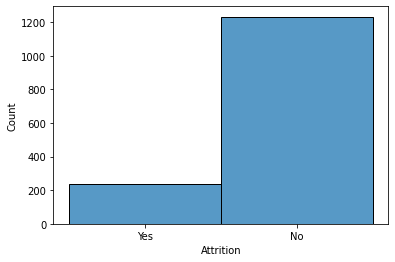

In [ ]:
sns.histplot(x= 'Attrition',data = df_HR)

Se puede ver que los datos están desequilibrados, por lo que es necesario eliminar algunos datos al azar para obtener un conjunto de datos más equilibrado.

In [ ]:
df_HR_Attrition_No = df_HR[df_HR['Attrition']=='No'].sample(n=300,random_state=2)
df_HR_Attrition_Yes = df_HR[df_HR['Attrition']=='Yes']
df_HR_sample = pd.concat([df_HR_Attrition_No,df_HR_Attrition_Yes],axis=0)
df_HR_sample = df_HR_sample.sample(frac = 1)
df_HR_sample.reset_index( drop=True, inplace=True)
df_HR_sample.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
1,22,Yes,Travel_Frequently,1368,Research & Development,4,1,Technical Degree,1,593,...,3,80,0,4,3,3,2,2,1,2
2,26,Yes,Travel_Rarely,1357,Research & Development,25,3,Life Sciences,1,55,...,3,80,0,1,2,2,1,0,0,1
3,46,No,Travel_Rarely,945,Human Resources,5,2,Medical,1,103,...,4,80,1,16,2,3,4,2,0,2
4,32,No,Travel_Frequently,967,Sales,8,3,Marketing,1,207,...,4,80,0,9,2,3,9,8,3,7


<AxesSubplot:xlabel='Attrition', ylabel='Count'>

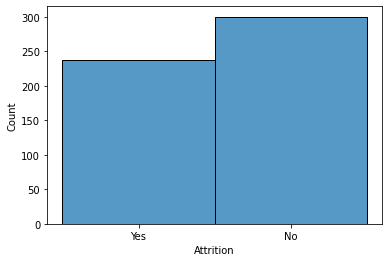

In [ ]:
sns.histplot(x= 'Attrition',data = df_HR_sample)

Algunos datos categóricos deben transformarse en información numérica.

In [ ]:
df_HR_sample_LR = df_HR_sample.copy()

df_HR_sample_LR['Attrition'].replace(['No','Yes',],[0, 1], inplace=True)
df_HR_sample_LR['Education'].replace(['No','Yes',],[0, 1], inplace=True)
df_HR_sample_LR['BusinessTravel'].replace([ 'Non-Travel','Travel_Rarely', 'Travel_Frequently'],[0, 1,2], inplace=True)
df_HR_sample_LR['Gender'].replace(['Female', 'Male'],[0, 1], inplace=True)
df_HR_sample_LR['OverTime'].replace(['Yes', 'No'],[1, 0], inplace=True)
df_HR_sample_LR.drop(columns = ['Department','EducationField','JobRole','MaritalStatus','EmployeeCount','Over18','StandardHours'],inplace=True)
df_HR_sample_LR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,1,1,1373,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
1,22,1,2,1368,4,1,593,3,1,99,...,3,3,0,4,3,3,2,2,1,2
2,26,1,1,1357,25,3,55,1,1,48,...,3,3,0,1,2,2,1,0,0,1
3,46,0,1,945,5,2,103,2,1,80,...,4,4,1,16,2,3,4,2,0,2
4,32,0,2,967,8,3,207,2,0,43,...,3,4,0,9,2,3,9,8,3,7


## Análisis básico de comparación 

<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

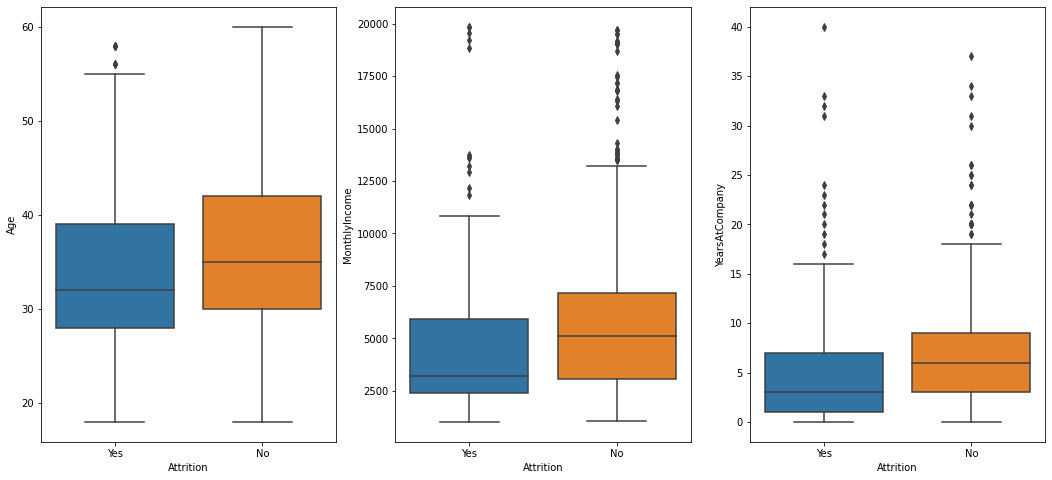

In [ ]:
fig, ax=plt.subplots(1,3, figsize=(18,8))
sns.boxplot(y='Age', x='Attrition', data=df_HR_sample, ax=ax[0])
sns.boxplot(y='MonthlyIncome', x ='Attrition', data = df_HR_sample, ax=ax[1])
sns.boxplot(y='YearsAtCompany', x='Attrition', data=df_HR_sample, ax=ax[2])

## Modelos de Clasificación


### Aprendizaje supervisado

El aprendizaje supervisado generalmente se realiza en el contexto de la clasificación, cuando queremos asignar entradas a etiquetas de salida, o regresión, cuando queremos asignar entradas a una salida continua. <figure>
<img src="/work/Modulo3_Caso5/fig/Supervised_Learning.png" align="center"/> 
</figure> 

El objetivo es encontrar relaciones o estructuras específicas en los datos de entrada que nos permitan producir de manera efectiva datos de salida correctos.<figure>
<img src="/work/Modulo3_Caso5/fig/supervised-machine-learning.png" align="center"/> 
</figure> 


https://towardsdatascience.com/supervised-vs-unsupervised-learning-14f68e32ea8d


### Medidas de desempeño para modelos de Clasificación

Las métricas utilizadas en los problemas de clasificación difieren mucho entre sí en su intención. Para definir la forma de calcular cada matriz, examinemos primero la **matriz de confusión**. Esta matriz permite visualizar las clasificaciones correctas e incorrectas que resultan de nuestro modelo.

<center>
<table>
    <thead>
        <tr>
            <th></th>
            <th></th>
            <th colspan=2 ><center>Valores reales </center></th>
        </tr>
        <tr>
            <th></th>
            <th></th>
            <th><center>Negativo (0)</th>
            <th><center>Positivo (1)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan=2><b>Valores pronosticados </b></td>
            <td><center><b>Negativo (0)</td>
            <td><center>Verdaderos negativos (TN)</td>
            <td><center>Falsos negativos (FN)</td>
        </tr>
        <tr>
            <td><center><b>Positivo (1)</td>
            <td><center>Falsos positivos (FP)</td>
            <td><center>Verdaderos positivos (TP)</td>
    </tbody>
</table>
</center>

Como se puede observar, se desea que la mayoría de los valores de la muestra caigan sobre los valores de la diagonal de la matriz, ya que eso significaría que la mayoría de las observaciones de la muestra se clasificaron correctamente. Usando la notación presente en la matriz de confusión, echemos un vistazo a las diferentes métricas de rendimiento que se pueden usar para problemas de clasificación.

La primera métrica es muy básica, la **precisión** del modelo. La precisión mide la proporción de observaciones que se clasificaron correctamente: <center> $\text{Exactitud}= \frac{TP+TN}{TP+FP+TN+FN}$ </center>

La precisión es simple de calcular pero tiene sus propias desventajas. Si el conjunto de datos está muy desequilibrado y el modelo clasifica todos los puntos de datos como puntos de datos de clase mayoritaria, la precisión será alta. Esto hace que la precisión no sea una métrica de rendimiento fiable para los datos desequilibrados. Por ejemplo, si el 90 % de los datos fueran positivos, un clasificador que prediga todas las observaciones como positivas tendría una precisión del 90 %, pero esto no significaría que el clasificador sea bueno.

La segunda métrica es la **precisión**. La precisión mide la proporción de observaciones predichas como positivas que se clasificaron correctamente. La precisión se calcula de la siguiente manera: <center> $\text{Precisión}= \frac{TP}{TP+FP}$ </center>

Si su problema de clasificación es uno en el que es realmente importante que las observaciones clasificadas como positivas sean realmente positivas, entonces la puntuación de precisión podría ser la métrica más relevante para medir el rendimiento del modelo de clasificación. Un ejemplo de un problema en el que la puntuación de precisión es realmente importante es aquel en el que el objetivo es clasificar a las personas enjuiciadas como culpables o no; en este problema se quiere que las personas clasificadas como culpables sean verdaderamente culpables.

La tercera métrica es el **recuerdo**. Recall mide la proporción de positivos que se clasificaron correctamente. La recuperación se calcula de la siguiente manera: <center> $\text{Recall}= \frac{TP}{TP+FN}$ </center>

Si su problema de clasificación es uno en el que es mucho más importante clasificar correctamente los aspectos positivos, entonces la puntuación de recuperación podría ser la métrica más relevante para medir el rendimiento del modelo de clasificación. Un ejemplo de un problema en el que el recuerdo podría ser una métrica muy importante es uno en el que las personas deben clasificarse como si tuvieran o no covid; en este problema se quiere que la mayoría de las personas que tienen covid estén correctamente clasificadas.

La cuarta métrica es la **puntuación f1**. La puntuación f1 es la media armónica de la recuperación y la precisión del modelo. El f1 socre se calcula de la siguiente manera: <center> $f_1= \frac{2precision*recall}{precision+recall}$ </center>

### Consideraciones de ajuste los modelos

#### p-value
Probailidad de obtener una observación más extrema que las que ya observamos. Me ayuda a determinar pruebas de hipótesis


#### Significancia ($\alpha$)
Determina el nivel de error que estamos dispuesto a asumir

<center>

$\alpha = Error\,Tipo \,1 = Probabilidad\, de  \,falso \, negativo $

</center>

Normalmente definimos $\alpha = 5\% = 0.05 $

#### $R-cuadrado$
su cantidad siempre va a estar entre 0 y 1. Cuanto mayor sea el $R^2$, mayor será el porcentaje de variación observada que puede ser explicado por el modelo


## Regresión logística

Considere un problema en el que una persona debe clasificarse como si entrará en incumplimiento (no poder pagar una deuda) o no, en función del saldo de la deuda. En este problema, la variable de respuesta $Y$ se puede codificar de la siguiente manera:<center> $
Y = \left\{
    \begin{matrix}
        0, \ \text {Si \ no \ cumple} \\
        1, \ \text {Si \ cumple} \\
    \end{matrix}
\right.
$ </center>

Con el fin de realizar la clasificación, se ajusta el un modelo de la siguiente forma a los datos:<center> $log(\frac{p(X)}{1-p(X)})= \beta_0 + X\beta$ </center>

Si $\beta_1$ es positivo, el aumento de $x_1$ se asociará con un aumento de $p(X)$, y si $\beta_1$ es negativo, el aumento de $x_1$ se asociará con una disminución de
$p(X)$.


## Train - Test Split

El 20 % de los datos se reserva para evaluar el rendimiento del modelo en datos en los que el modelo no ha sido entrenado. Esto con el fin de garantizar que no se compruebe el funcionamiento del modelo con las mismas condiciones con las que fue entrenado. 

In [ ]:
np.random.seed(135568109) 
ndata = len(df_HR_sample_LR)
idx_train = np.random.choice(range(ndata),int(0.8*ndata),replace=False)
idx_test  = np.asarray(list(set(range(ndata)) - set(idx_train)))
train     = df_HR_sample_LR.iloc[idx_train] 
test      = df_HR_sample_LR.iloc[idx_test]  
print(train.shape) 
print(test.shape)  

(429, 28)
(108, 28)


## Ejercicio 1

Determine si un modelo con solo las variables `edad` y `Educación` es significativo para determinar si una persona se va a ir de la empresa. ¿Qué puede concluir al respecto?

In [ ]:
#Definition of input variables
X_1 = train[['Age','Education']]
#Definition of output variable
y_1 = train['Attrition']

#Building the model and fitting the data
log_reg_1 = sm.Logit(y_1, X_1).fit()

#Printing the summary table
print(log_reg_1.summary())

Optimization terminated successfully.
         Current function value: 0.684015
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  429
Model:                          Logit   Df Residuals:                      427
Method:                           MLE   Df Model:                            1
Date:                Sat, 12 Mar 2022   Pseudo R-squ.:                0.007844
Time:                        17:43:51   Log-Likelihood:                -293.44
converged:                       True   LL-Null:                       -295.76
Covariance Type:            nonrobust   LLR p-value:                   0.03124
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0149      0.008     -1.960      0.050      -0.030   -6.67e-07
Education      0.1016      0.

**Respuesta**

## Ejercicio 2

¿Qué variables consideraría que deberían ser importantes en la construcción de un modelo para determinar si una persona se va a ir de la empresa? Ejecute un modelo para verificar su hipótesis. ¿Qué puedes concluir al respecto?

**Respuesta**

In [ ]:
#Definition of input variables
X_2 = train[['YearsAtCompany']]
#Definition of output variable
y_2 = train['Attrition']

#Building the model and fitting the data
log_reg_2 = sm.Logit(y_2, X_2).fit()

#Printing the summary table
print(log_reg_2.summary())

Optimization terminated successfully.
         Current function value: 0.667466
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  429
Model:                          Logit   Df Residuals:                      428
Method:                           MLE   Df Model:                            0
Date:                Sat, 12 Mar 2022   Pseudo R-squ.:                 0.03185
Time:                        17:43:51   Log-Likelihood:                -286.34
converged:                       True   LL-Null:                       -295.76
Covariance Type:            nonrobust   LLR p-value:                       nan
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
YearsAtCompany    -0.0533      0.012     -4.402      0.000      -0.077      -0.030


## Ejercicio 3
Ejecute un modelo que contenga todas las variables en el conjunto de datos. Qué variables siguen siendo relevantes para determinar si una persona se va a ir de la empresa. ¿Qué puedes concluir al respecto?

**Respuesta**

In [ ]:
#Definition of input variables
X_3 = train.drop(columns='Attrition')
#Definition of output variable
y_3 = train['Attrition']

#Building the model and fitting the data
log_reg_3 = sm.Logit(y_3, X_3).fit()

#Printing the summary table
print(log_reg_3.summary())

Optimization terminated successfully.
         Current function value: 0.485094
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  429
Model:                          Logit   Df Residuals:                      402
Method:                           MLE   Df Model:                           26
Date:                Sat, 12 Mar 2022   Pseudo R-squ.:                  0.2964
Time:                        17:43:51   Log-Likelihood:                -208.11
converged:                       True   LL-Null:                       -295.76
Covariance Type:            nonrobust   LLR p-value:                 4.237e-24
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0025      0.019     -0.134      0.893      -0.039

## Ejercicio 4
Ejecute un modelo que contenga solo variables que sean significativas para el modelo. ¿Qué puedes concluir al respecto?

In [ ]:
df_HR_sample_LR.drop(columns = ['Age','DailyRate','Education','EmployeeNumber','Gender','HourlyRate','JobLevel','MonthlyRate','NumCompaniesWorked','NumCompaniesWorked','OverTime','RelationshipSatisfaction','WorkLifeBalance','MonthlyIncome','DistanceFromHome','PercentSalaryHike','TrainingTimesLastYear','YearsAtCompany','EnvironmentSatisfaction','TotalWorkingYears'],inplace=True)

np.random.seed(135568109) # a seed makes the analysis reproducible
                     # so everyone will get the same results
ndata = len(df_HR_sample_LR)
# Randomly choose 0.8n indices between 1 and n
idx_train = np.random.choice(range(ndata),int(0.8*ndata),replace=False)
# The test set is comprised from all the indices that were
# not selected in the training set:
idx_test  = np.asarray(list(set(range(ndata)) - set(idx_train)))
train     = df_HR_sample_LR.iloc[idx_train] # the training data set
test      = df_HR_sample_LR.iloc[idx_test]  # the test data set
print(train.shape) #
print(test.shape)  #  

(429, 9)
(108, 9)


In [ ]:
#Definition of input variables
X_4 = train.drop(columns='Attrition')
#Definition of output variable
y_4 = train['Attrition']

#Building the model and fitting the data
log_reg_4 = sm.Logit(y_4, X_4).fit()

#Printing the summary table
print(log_reg_4.summary())

Optimization terminated successfully.
         Current function value: 0.592254
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  429
Model:                          Logit   Df Residuals:                      421
Method:                           MLE   Df Model:                            7
Date:                Sat, 12 Mar 2022   Pseudo R-squ.:                  0.1409
Time:                        17:43:51   Log-Likelihood:                -254.08
converged:                       True   LL-Null:                       -295.76
Covariance Type:            nonrobust   LLR p-value:                 2.823e-15
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
BusinessTravel              0.8143      0.209      3.889      0.000       0.404   

## Evaluación del modelo de regresión logística

La curva ROC es una curva que permite resumir todas las matrices de confusión que puede crear un modelo cambiando su umbral de clasificación. El umbral de clasificación es el punto de corte de la probabilidad calculada que separa las observaciones clasificadas como positivas y las observaciones clasificadas como negativas

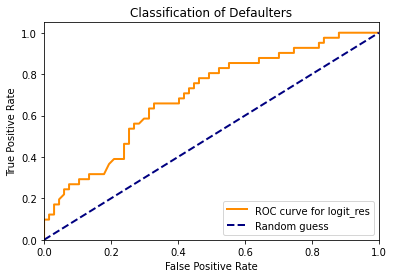

In [ ]:
predict_p = log_reg_4.predict(test[['BusinessTravel','JobInvolvement','JobSatisfaction','PerformanceRating','StockOptionLevel','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']])
#predict_2_p = logit_res2.predict(df6[['Intercept','loan_amnt','int_rate']])
roc_p = roc_curve(test['Attrition'], predict_p)
#roc_2_p = roc_curve(df6['loan_status'], predict_2_p)

plt.figure()
line_width = 2
plt.plot(roc_p[0], roc_p[1], color='darkorange',
         lw=line_width, label=f'ROC curve for logit_res')
#plt.plot(roc_2_p[0], roc_2_p[1], color='darkgreen',
         #lw=line_width, label=f'ROC curve for model in Ex 6')
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Defaulters')
plt.legend(loc='lower right')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6bb6c849-6b4b-49a2-8775-80ecb8e8b9b2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>